In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("movies_2.csv")
df_orig=df
df=df.drop("Summary",axis=1)

In [ ]:
df["Title"].value_counts()
#There are some duplicate values
df=df.drop_duplicates(subset="Title",keep="first")
df.dropna(subset=["Title"],inplace=True)
#Dropped the rows with missing Title value

In [ ]:
#Standarizing the values' format
df.columns=df.columns.str.replace(" ","_")
df["Title"]=(df["Title"].str.replace(" ","_").str.lower()).astype("string")
df["Release_Date"]=pd.to_datetime(df["Release_Date"])
df["Genre"]=(df["Genre"].str.lower()).astype("string")
df["MPAA_Rating"]=(df["MPAA_Rating"].str.upper()).astype("string")
#Replacing NaN values with the average
df["Rating"].fillna(value=df["Rating"].median(),inplace=True)
df["Rating_Count"].fillna(value=df["Rating_Count"].median(),inplace=True)
#Better replace the missing rating with the mode, results in a more distributed values

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

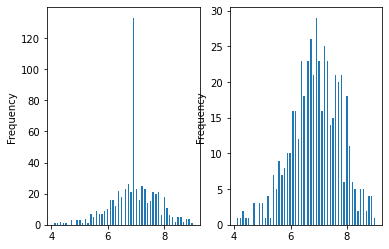

In [129]:
fig, axes=plt.subplots(nrows=1,ncols=2)
df["Rating"].plot.hist(bins=100,ax=axes[0])
df_orig["Rating"].plot.hist(bins=100,ax=axes[1])
plt.tight_layout

In [ ]:
temp=df.loc[(df["Rating"]>7)&(df["Gross"]>5e7)]
rat_gross=temp["Title"]

temp=df.loc[(df["Rating"]>7)&(df["Gross"]>5e7)&(df["MPAA_Rating"]=="PG")]
rat_gross_par=temp["Title"]

good_anim=(df.loc[(df["Genre"]=="animation")&(df["Rating"]>7)]).shape[0]

temp=(df.sort_values(by="Budget",axis=0,ascending=False)).head(5)
budget5=temp["Title"]

temp=(df.loc[(df["Genre"]=="comedy")]).sort_values(by="Rating",axis=0,ascending=False).head(5)
comedy5=temp["Title"]

rating5=((df.sort_values(by="Rating",axis=0,ascending=False))["Title"]).head(5)

temp=((df.loc[(df["Genre"]=="romance")&(df["Release_Date"]>"1999-12-31")]).sort_values(by="Gross",axis=0,ascending=False)).head(3)
rom_gross=temp["Title"]

genres=df["Genre"].value_counts().shape

temp=((df.loc[(df["Release_Date"]>"1999-12-31")]).sort_values(by="Budget",axis=0,ascending=False)).head(5)
recent_budget5=temp["Title"]

temp=df.value_counts("MPAA_Rating",normalize=True).iloc[[0,-1]]
most_least_mpaa=list(temp.index)

temp=(df.groupby(["Genre"]).mean()).sort_values(by="Budget",axis=0,ascending=False).iloc[[0,-1]]
most_least_exp_genre=list(temp.index)

temp=(df.groupby(["Genre"]).mean()).sort_values(by="Gross",axis=0,ascending=False).head(1)
fav_genre_gross=list(temp.index)

temp=(df.groupby(["Genre"]).mean()).sort_values(by="Rating",axis=0,ascending=False).head(1)
fav_genre_rat=list(temp.index)